In [1]:
# Numerical Operations
import math
import numpy as np

# Reading/Writing Data
import pandas as pd
import os
import csv

# For Progress Bar
from tqdm import tqdm

# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

# For plotting learning curve
#from torch.utils.tensorboard import SummaryWriter

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans


import os

In [2]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [3]:
current_dir = os.getcwd()
parent_dir  = os.path.dirname(current_dir)
public  = pd.read_csv(parent_dir + r'/datasets/public_processed.csv') #,usecols=lambda column: column != 'txkey')
train   = pd.read_csv(parent_dir + r'/datasets/training.csv') #,usecols=lambda column: column != 'txkey')


In [4]:
df = pd.concat([public,train])

In [5]:
del public, train

In [6]:
df = df.fillna(-1)
df.head(10)

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,d6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c...,9c454e0cf3680075b0382394ca59b00ee9435fd829da29...,4,1.0,8be206f97d10b57a46ea0ef5527155a0f9b48d16255b70...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,272.0,1353.00,0,1,3.0,0,1349,0.0,15759.0,-1.0,0,0,6.0,70.0,1349,0,-1.0
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,b599fb83473599fa2df4a04136a668c28df7914293f1da...,9f097cba6a70333c906904ebaad438356cf75b6abf5dd4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,305.00,1,0,0.0,0,306,0.0,13451.0,-1.0,0,0,6.0,70.0,306,0,-1.0
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,8de197129150d454df1639e9743c1aa11b1c1122a2010c...,439691cb167b272661c2eb9073124f5d422f446b0f92fb...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,20.00,0,0,0.0,0,20,0.0,15759.0,-1.0,0,0,-1.0,-1.0,0,0,-1.0
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a406...,992679b728784192c17e90939918cbfae32ad1222fad26...,5,5.0,bd2b3523b4ecd652445b75ea7583c92f6f02af3971251b...,70dac5b1dfde828f556a93321a649df72891db35430588...,272.0,8371.00,1,0,0.0,0,8339,42.0,12381.0,-1.0,0,0,6.0,70.0,8339,0,-1.0
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,27d235e691a425098f291105f78f9877e05bb75e1f132b...,763fd2a91420f9b632c378ca82ff9e318851fa1964cbba...,5,5.0,156987f72b8993b8c5a898fa76f3b8e6454e10e18aa238...,89b1654aaef0b65b1868004cfdce2dcbb67f15b7fba535...,217.0,163.69,1,0,0.0,0,163,126.0,14786.0,-1.0,0,0,6.0,68.0,5,0,-1.0
5,fd64ce519d3850ba9da4ee7fd0832222693193088e89dc...,59,152823,ee088992c8a0188647bd57018e2a0d32c5f572eab9ed5a...,f57fa89a86108807bb4c04dfc42a08d679ffeffe2fbee3...,5,5.0,c2f959592b9f6b1ea8fbe12e9a4a1ac0fd0b2543dd3fe3...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,275.0,10.00,1,0,0.0,0,10,0.0,16115.0,-1.0,0,0,6.0,70.0,10,0,-1.0
6,0c93f45dac9454a159daacfd6bb1f63fabd6c75d92a47e...,59,113224,02bd712ddaae04c874f1d1f1d74069da69b99da1eef7a4...,2cd8983df4f8fac49c6bcb28432638d7bf538fd22ac920...,5,4.0,466f3ec97458ba5e90f0fab6fd7433c1e3ae9150e8229d...,d0c4efb29970311d8492fbfb19616b631f38593cafff95...,282.0,125.00,0,0,0.0,0,125,0.0,15759.0,-1.0,0,0,0.0,70.0,125,0,-1.0
7,f46b16150256c36df77817ccc9a8450e82532457dcb1ad...,56,131739,db35e8dbabf21f1ba960682dc66472ef9c5e3b2dcc26bf...,aa93e894a24e171f2eb9d2e48db31c0b6bc863a62d446a...,5,8.0,c76449edde6889cc61d4403b96b5fbe097b709fee4ee8a...,bcf6370b700fb26d1fab05dad5de442b2bf37689cb55fd...,320.0,55.00,1,0,0.0,0,55,0.0,15759.0,-1.0,0,0,6.0,70.0,55,0,-1.0
8,b62dc04dd4442d27e6a6c87ab82ad98b11f04737d54f97...,56,83744,c42029ff9987b7bce96c132adbcbf38bb05b9d50207f3b...,44265db723e26c1cfd830a1c8d9eb9fef540a806c75491...,5,5.0,e8d98e44151198526e079fdcc7f44c1e16be6f1fc2fb96...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,276.0,222.00,1,0,0.0,0,222,0.0,15759.0,-1.0,0,0,6.0,70.0,222,0,-1.0
9,6f230b30cb79f7b5791348b2a0464cbc92682d94bdd8e9...,56,163138,30aeda17a7ad0a066e4a354460ee0ad0bf5098f6b1d76e...,2242b3ba5e82a24aff6fa4e54b871a4e677e53b0d1c4d2...,5,4.0,f6ed25e91e9858ae7ca6a24943175e6b9569a7ada6bd5e...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,298.0,3090.00,0,0,0.0,0,3100,0.0,15759.0,-1.0,0,0,6.0,70.0,3100,0,-1.0


In [7]:
df['weekday'] = df.locdt % 7
df['h_loctm'] = df.loctm // 10000
df['m_loctm'] = (df.loctm % 10000) //100
df['s_loctm'] = df.loctm % 100
df['mins_loctm'] =  (df.h_loctm*3600  + df.m_loctm*60 + df.s_loctm) /60

first_chid_mapping = df.groupby('cano')['chid'].first()
#把chid換成沒有重複的chid
df['chid'] = df['cano'].map(first_chid_mapping)

# 可以檢查
# df[df.cano.isin(cano_chid_counts[cano_chid_counts>1].index)]
del first_chid_mapping

In [73]:
def str_trans_num(data, columns, reverse = False):
    mapping_dict = {}
    new_data = data[columns].copy()  # 創建一個新的 DataFrame，以免影響原始資料

    if not reverse :
        for x in columns:
            for i, str_val in enumerate(data[x].unique()):
                mapping_dict[str_val] = i
            new_data[x] = data[x].map(mapping_dict)
        return new_data
    else:
        reversed_mapping_list = []
        for x in columns:
            unique_values = data[x].unique()
            reversed_mapping_list.append({i: v for i, v in enumerate(unique_values)})

        return reversed_mapping_list

In [72]:
# # 如果還要轉回來就先跑這個
# reversed_mapping_list = str_trans_num(df,replaced_cols,reverse=True)

# # 如果最後再轉回來，就要跑這個
# def num_trans_str(data,replaced_cols,reversed_mapping_list):
#     new_data = data.copy() 
#     for i, x in enumerate(replaced_cols):
#         reversed_mapping = reversed_mapping_list[i]
#         new_data[x] = data[x].map(reversed_mapping)
#     return new_data

# 最後跑這個
# data[replaced_cols] = num_trans_str(data,replaced_cols,reversed_mapping_list)


[{0: 'd6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c37739c7f3453168a07',
  1: 'b599fb83473599fa2df4a04136a668c28df7914293f1da0a4cee5e3eba7ff320',
  2: '8de197129150d454df1639e9743c1aa11b1c1122a2010c0e7f0eabe4299eb31a',
  3: 'f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a4069bcecb43870967eba5',
  4: '27d235e691a425098f291105f78f9877e05bb75e1f132b4039a5373ad46882af',
  5: 'ee088992c8a0188647bd57018e2a0d32c5f572eab9ed5a7998ab8f821793e9c5',
  6: '02bd712ddaae04c874f1d1f1d74069da69b99da1eef7a43e75662ff01b3c1d88',
  7: 'db35e8dbabf21f1ba960682dc66472ef9c5e3b2dcc26bff168d6131d61cf2c7e',
  8: 'c42029ff9987b7bce96c132adbcbf38bb05b9d50207f3b07b7305684ede84611',
  9: '30aeda17a7ad0a066e4a354460ee0ad0bf5098f6b1d76ecd2e6ee88062402b81',
  10: '9538dfec8ae2639a659e60a664f514edea2352bf9a38fd628b059d8c9d5e913e',
  11: 'ce2cd190129e532608658854e97d8ca28d6c716b72fde66095cbe5c225d9778e',
  12: '16216f6229a384300c3cf863508380a69f381fa688310e7421fde6bae103d1ac',
  13: '75a8dc4023c74b45e74461a41b2c49c4062e1c90f

In [74]:
replaced_cols = ['chid','cano','mchno','acqic']
df[replaced_cols]= str_trans_num(df,replaced_cols)
df.head(10)

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label,weekday,h_loctm,m_loctm,s_loctm,mins_loctm,cano_num
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,0,0,4,1.0,0,0,272.0,1353.00,0,1,3.0,0,1349,0.0,15759.0,-1.0,0,0,6.0,70.0,1349,0,-1.0,0,10,51,57,651.950000,0
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,1,1,5,8.0,1,1,320.0,305.00,1,0,0.0,0,306,0.0,13451.0,-1.0,0,0,6.0,70.0,306,0,-1.0,0,18,55,20,1135.333333,1
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,2,2,5,1.0,2,2,494.0,20.00,0,0,0.0,0,20,0.0,15759.0,-1.0,0,0,-1.0,-1.0,0,0,-1.0,3,10,23,12,623.200000,2
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,3,3,5,5.0,3,3,272.0,8371.00,1,0,0.0,0,8339,42.0,12381.0,-1.0,0,0,6.0,70.0,8339,0,-1.0,2,23,1,38,1381.633333,3
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,4,4,5,5.0,4,4,217.0,163.69,1,0,0.0,0,163,126.0,14786.0,-1.0,0,0,6.0,68.0,5,0,-1.0,3,10,19,37,619.616667,4
5,fd64ce519d3850ba9da4ee7fd0832222693193088e89dc...,59,152823,5,5,5,5.0,5,5,275.0,10.00,1,0,0.0,0,10,0.0,16115.0,-1.0,0,0,6.0,70.0,10,0,-1.0,3,15,28,23,928.383333,5
6,0c93f45dac9454a159daacfd6bb1f63fabd6c75d92a47e...,59,113224,6,6,5,4.0,6,6,282.0,125.00,0,0,0.0,0,125,0.0,15759.0,-1.0,0,0,0.0,70.0,125,0,-1.0,3,11,32,24,692.400000,6
7,f46b16150256c36df77817ccc9a8450e82532457dcb1ad...,56,131739,7,7,5,8.0,7,7,320.0,55.00,1,0,0.0,0,55,0.0,15759.0,-1.0,0,0,6.0,70.0,55,0,-1.0,0,13,17,39,797.650000,7
8,b62dc04dd4442d27e6a6c87ab82ad98b11f04737d54f97...,56,83744,8,8,5,5.0,8,8,276.0,222.00,1,0,0.0,0,222,0.0,15759.0,-1.0,0,0,6.0,70.0,222,0,-1.0,0,8,37,44,517.733333,8
9,6f230b30cb79f7b5791348b2a0464cbc92682d94bdd8e9...,56,163138,9,9,5,4.0,9,5,298.0,3090.00,0,0,0.0,0,3100,0.0,15759.0,-1.0,0,0,6.0,70.0,3100,0,-1.0,0,16,31,38,991.633333,9


連續盜刷的人之中，近八成(79.7896%)在三天內遭連續盜刷，66.43%在同一天內連續盜刷

In [ ]:

AA = df[(df.label!=-1)].groupby('cano')['label'].sum()
AAA = df[df.cano.isin(AA[AA>1].index)&(df.label==1)]
AAAA = AAA.groupby('cano')['locdt'].transform(lambda y:y-y.min())
(AAAA.value_counts()/len(AAAA)).sort_index().cumsum().plot(kind='line')

plt.title('Cumulative Percentage of fraud_consecutive')
plt.xlabel('Categories')
plt.ylabel('Cumulative Percentage')

# 設定 y 軸範圍
plt.ylim(0, 1)

plt.show()

正常跟異常資料的個數跟比例

In [ ]:

print((train['label']==0).sum(),(train['label']==1).sum())

8656497 32029


In [ ]:
print('percent:{:.2%}'.format(32029/8656497))

percent:0.37%


## 缺失值檢查與填補

In [ ]:
train.isna().sum()[train.isna().sum()>0]

etymd     203455
mcc         4550
stocn        600
scity     266066
stscd    8665195
hcefg     286656
csmcu     498657
dtype: int64

In [ ]:
train = train.fillna(-1)

In [ ]:
# train.stscd = train.stscd.fillna(-1) #8665195
# train.mcc = train.mcc.fillna(-1) #600
# train.stocn = train.stocn.fillna(-1) #600

In [ ]:
A = train.isna().sum()
A[A>0]

etymd    203455
scity    266066
hcefg    286656
csmcu    498657
dtype: int64

acqic在搞

In [ ]:
train[train.acqic=='4d349d9cd02873b7cc8519caea9b55bc716417aeb0547cfb16d9b9e20be23b91']

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
6075042,c2fdf5bf7535734f8413aa9fcd87db9ffae360cbf036aa...,7,82028,d1e4a9a90d1a67f60c6212a9651f76a4f25e534e13df13...,04b400656e4ec85dc3369fe7448f41de238e2e938a0f1b...,5,NaN,4b184bc24ca32587f2468cfb1376a2f787512447dd1ab5...,4d349d9cd02873b7cc8519caea9b55bc716417aeb0547c...,495.0,500.0,0,0,0.0,0,502,0.0,NaN,NaN,0,0,6.0,NaN,502,0,0
8209901,f174e0c82bcbeb63157cdb31b2dc5879db7f942f8c625f...,20,123229,ddf228808e1bf4588e4d450e226f5c424c212fb1786697...,8c5086904f5150a6c71d505d7f34c5ba61948bbe7d9638...,5,NaN,4b184bc24ca32587f2468cfb1376a2f787512447dd1ab5...,4d349d9cd02873b7cc8519caea9b55bc716417aeb0547c...,495.0,500.0,0,0,0.0,0,499,0.0,NaN,NaN,0,0,6.0,NaN,499,0,0


In [ ]:
# train[(train.stocn==0)&(train.scity.isna())].mchno.value_counts()
#train[~train.mchno.isna()].mchno.value_counts()

train[train.mchno.isin(train[train.scity.isna()].mchno.value_counts().index)].scity

49             NaN
64             NaN
71             NaN
76             NaN
78             NaN
            ...   
8688415    15759.0
8688432    15759.0
8688484        NaN
8688486    15759.0
8688509        NaN
Name: scity, Length: 529902, dtype: float64

In [ ]:
train[(train.stocn==0)&(train.scity.isna())].acqic.value_counts()
#len(train[train.acqic=='814437ad6838efec5e9ebd8600d37a984f221ca2f7a83fb66ccd80505e585745'])

#train[train.acqic=='814437ad6838efec5e9ebd8600d37a984f221ca2f7a83fb66ccd80505e585745'].isna().sum()


acqic
814437ad6838efec5e9ebd8600d37a984f221ca2f7a83fb66ccd80505e585745    114349
8ccfdd7858e90e854599488e0f7453996a6268788bf36983ec81e10bc147f826     44449
16e2a0ad7a09b6a46a5711b9f79965689383832e4e02dc270da0e35810306270      9056
cf12b86a163b0dc6b9d671540aa04b0f533248c91add689f3560c9cc634273fb      7991
760a1509f55f2f9f43f8253c2519fa64bd3b3a10f045b393499a454916369501      6506
                                                                     ...  
dfb3e02d7c907422a4e502b604e32e4f044dee206ffb8202aaa11726276ab8a7         1
367f6aa227bb5a3051f45cc3c143d1a4e231516292a8242bb0ab1ff454aa704f         1
9452bfd9c39f730e9941ad0498ef952a10bd260ce3084e7c01ac1f221ebd2ebc         1
474f5ca19dde0bcf7f4d718f12b5bda6cd450744116dc08e8c4a89d0ad645bea         1
d0596273fe357a0af39fc6beaefd9cb1317b40ca24e54355ff7a35dd318e92fa         1
Name: count, Length: 5881, dtype: int64

In [ ]:
train[train.stocn==0].csmcu.value_counts()

csmcu
70.0    7349441
68.0      15733
81.0          1
Name: count, dtype: int64

In [ ]:
train[(train.csmcu==68)].stocn.isna().sum()

160

In [ ]:
train[(train.stocn==0)&(train.csmcu.isna())]

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
49,16679b5ed32d59fa97953f8fdc286959aef492c8a6595f...,28,174101,54a108762edf70d98b5039cfcb164e43ce6e2591d06338...,2e0c76da02b728454f46ca145be3bb653875d8f3a5afa8...,5,NaN,20ed456deae86bf216176c4e488ba5ce174e197208209e...,814437ad6838efec5e9ebd8600d37a984f221ca2f7a83f...,499.0,500.0,0,0,0.0,0,500,0.0,NaN,NaN,0,0,6.0,NaN,49955,0,0
64,8ad26d8a1ef96ed9ad70c2d9c3ec023381f498b56539fe...,7,154904,d1c0edf7f0db8706d33a83304ac95a67d230ef05994d7b...,87398a171b24efa432b5e2106a86b60e6d442e1e36bd08...,5,NaN,f1a36c672aaf32222b8c8ed023c6a8edfe5f8e52a781d7...,814437ad6838efec5e9ebd8600d37a984f221ca2f7a83f...,499.0,500.0,0,0,0.0,0,498,0.0,NaN,NaN,0,0,6.0,NaN,49765,0,0
71,0f722184ac164224078b5ccbe5196d528651734de76d99...,21,105508,70c093f32abca8aba41e3bc34e95399ba3df425ae44d09...,81b8a68577be5ef936eaf91eb9d324113672a8c92f306b...,5,NaN,0bd7da8c4387afa9a1d96367ed0436ab28fb07b0bb9a84...,814437ad6838efec5e9ebd8600d37a984f221ca2f7a83f...,499.0,500.0,0,0,0.0,0,502,0.0,NaN,NaN,0,0,6.0,NaN,50200,0,0
76,5e58377aaa4c56394727f1ab11761c55a9740fe7c9a560...,3,143109,1dfd565c8559c67975e37eb6809d306e4104f6c0a51819...,1d9556ee39c334dfe88dfdd72da82d23e68a5549118f3a...,5,NaN,0bd7da8c4387afa9a1d96367ed0436ab28fb07b0bb9a84...,814437ad6838efec5e9ebd8600d37a984f221ca2f7a83f...,499.0,500.0,0,0,0.0,0,499,0.0,NaN,NaN,0,0,6.0,NaN,49905,0,0
78,b3322bd18354880198968eaa1e7ff7b4df7bbe92fbe1e1...,19,164910,8da02baf0edd588464de1c8ee304564a0b0e8fed4d9a01...,78b20f5ebec33ec09889a954c93f877aa67ac266daf69b...,5,NaN,0bd7da8c4387afa9a1d96367ed0436ab28fb07b0bb9a84...,814437ad6838efec5e9ebd8600d37a984f221ca2f7a83f...,499.0,500.0,0,0,0.0,0,500,0.0,NaN,NaN,0,0,6.0,NaN,50050,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688415,4ce931d97e9a1808b993033dcfa0eaa390b7b88639935a...,0,83659,ee4d9637b817b74a092d795f72d42bdde6b3f1b66316cf...,b2ad42da4ea14e90784ddb5b173dd4ee25b60ae3c89a73...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,493.0,400.0,0,0,0.0,0,399,0.0,15759.0,NaN,0,0,NaN,NaN,0,0,0
8688432,80d29b6739a4de25492bb8a0c1709768dd3e423c4cc6dc...,14,102919,1bd4751bd62b6d5c5ad056e7c653ce14f81bd35027a24f...,5aaf943cc44f5d9371542a572654d5e03ad4e1999833a8...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,20.0,0,0,0.0,0,20,0.0,15759.0,NaN,0,0,NaN,NaN,0,0,0
8688484,2a820b46eae154c569f473e47745a39f4dfda15aace940...,16,143106,f0b481311a81fba645a005599c764cabeacd21a10ac417...,70dfc1fbf29fd5a556f9ac39e5455832106d539422b4bb...,5,NaN,6b0f2ca4ce5589561bcc92866f9e118dc03ffc82f63769...,8ccfdd7858e90e854599488e0f7453996a6268788bf369...,499.0,500.0,0,0,0.0,0,501,0.0,NaN,NaN,0,0,6.0,NaN,50070,0,0
8688486,de101459f39f9bf3073e2f1d6d8ed18cf82bad16fe0862...,14,101836,5fb5c9769732acc1a614b6d2d8ba7fef602d9570996d4d...,21840da738267c8686f50b399a294529cf257da4ded950...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,60.0,0,0,0.0,0,60,0.0,15759.0,NaN,0,0,NaN,NaN,0,0,0


In [ ]:
train.csmcu.value_counts()

csmcu
70.0    7947443
68.0     122569
81.0      27575
29.0      27074
76.0      12450
         ...   
80.0          2
5.0           1
21.0          1
83.0          1
4.0           1
Name: count, Length: 79, dtype: int64

In [ ]:
train[train.cano=='e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe41668f5e734172db273']

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
21205,f94753408bc6ddc079b395c38256db19c5d1bb8bb6f692...,26,75652,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,4270.09,0,0,0.0,0,4291,NaN,NaN,NaN,0,0,6.0,70.0,4291,0,1
853441,2162163ecedd706a55e601fb718a95a86e2b219e246e12...,28,63144,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,5539.58,0,0,0.0,0,5566,NaN,NaN,NaN,0,0,6.0,70.0,5566,0,1
5199370,8dec519fddc54767f0ea2c722abab00c7dbd937ca3e38c...,25,51223,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,2.32,0,0,0.0,0,2,NaN,NaN,NaN,0,0,6.0,70.0,2,0,1
5467611,20d4ad186461b724b82a312bcc9c5507800f2440d8a375...,28,62632,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,8540.18,0,0,0.0,0,8581,NaN,NaN,NaN,0,0,6.0,70.0,8581,0,1
6974601,56bf1f835d23c437fbb3c178411f82ef7251c0fdd71bb6...,28,62631,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,2.31,0,0,0.0,0,2,NaN,NaN,NaN,0,0,6.0,70.0,2,0,1
7201705,d2cb1b58a3f81fa607bd98eed3350ff247f1181d8cc065...,28,63143,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,2.31,0,0,0.0,0,2,NaN,NaN,NaN,0,0,6.0,70.0,2,0,1
8027340,632253e79156ab803b399f4a0a3f3bccd9950025cf748e...,26,75651,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,2.31,0,0,0.0,0,2,NaN,NaN,NaN,0,0,6.0,70.0,2,0,1
8361497,6d5b601f364a2ce7a52c76bc26f20bc4acf27196e36c6b...,25,51224,9adf180bf1491b4cba3a021201076b04e8fc51e802365b...,e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe4...,5,1.0,907e2b1e5adf39ca1f65b6e8251c41f74537ebdb3118e2...,ea8724e1181e9a7318604aa768bb5cfbfca5b85c75b1b7...,486.0,11131.75,0,0,0.0,0,11185,NaN,NaN,NaN,0,0,6.0,70.0,11185,0,1


In [ ]:
#train[train.stocn.isna()].cano.value_counts()

train[train.stocn.isna()].cano.value_counts()

for index, value in train[train.stocn.isna()].cano.value_counts().items():
    if len(train[train.cano==index])>1:
        print(index,len(train[train.cano==index]),'比例 ={:.2%} '.format(value/len(train[train.cano==index])))
    #print(value/len(train[train.cano==index]))
#        print(f'cano: {index}, count: {value}')


2ec598d135c3718aa180a727f089c490270e9d30f4f34f9adc8f4ebdd88db817 330 比例 =9.09% 
1e76714d2928e0dc1b76060f28bd8c52a351a206194b076625a521c70289bc6d 43 比例 =20.93% 
7340e3a3204f1928a6d68c6d9dcbbb82daad446e8fe2911097043c60a57aa65b 225 比例 =4.00% 
e7f56d2d90f07715c5fc8d62634ea35f00779297b72fe41668f5e734172db273 8 比例 =100.00% 
ce453e0b14800885ffa456680d83c9aea3a69d52aa4cec133906ec26bd5ec405 97 比例 =8.25% 
67da333485d94ed55487640cf33edaa6167131f5f37d029730c7c8830e1affb2 128 比例 =5.47% 
3f6519d1512e16ac9631b6b4912e16a138fbe2656dd6e76bdd6442c276908b05 166 比例 =3.61% 
585ac946c62458b035cd00bb18939159c52c1ffb393227a3fc863955d7274503 34 比例 =17.65% 
02012023ee36c30f9223e918acf4c8fa85cdc8b4ae5f3cc2ed781d7a11470748 212 比例 =2.36% 
3103e5e0639f9afd6b999153be6a54df116ec52006d6db75c536b645381481b6 24 比例 =20.83% 
a75f21acb09fa26bc24679c0950ab01d7c1f97c9951e2778e386562ef6e25966 121 比例 =4.13% 
733b8c7dc2335ded7ad26e62f38c2a54fe931c2186920e1cb7f69a9f04cf2abb 208 比例 =2.40% 
2e21b3b974cbd2437f92061ac3b4c104b8c717a18

KeyboardInterrupt: 

etymd 在盜刷的時候缺失值是正常交易的1/10

In [ ]:
print(203455/len(train))
print('理論上，etymd在盜刷情況下缺失值有',round(203455/len(train)*sum(train.label==1),2),'筆，實際上僅',sum(train[train.label==1].etymd.isna()),'筆')

0.02341651506826359
理論上，etymd在盜刷情況下缺失值有 750.01 筆，實際上僅 71 筆


stscd是狀態碼，可推論通常是卡片狀態異常才會有值

In [ ]:
print(f'在stscd不缺失(狀態異常)的情況下，正常交易筆數為 {len(train[(~train.stscd.isna()) & (train.label==0)])} 筆，異常交易筆數為 {len(train[(~train.stscd.isna()) & (train.label==1)])} 筆')

在stscd不缺失(狀態異常)的情況下，正常交易筆數為 12852 筆，異常交易筆數為 10479 筆


In [ ]:
na_name = (train.isna().sum()[train.isna().sum()>0].index)
na_name

Index(['etymd', 'mcc', 'stocn', 'scity', 'stscd', 'hcefg', 'csmcu'], dtype='object')

csmcu     

In [ ]:
def hot_deck_imputation(data, variable, distance_metric='euclidean'):
    # 创建一个新的数据框用于存储插补后的值
    imputed_data = data.copy()

    # 找到含有缺失值的行
    missing_rows = data[data[variable].isna()]

    # 找到没有缺失值的行
    complete_rows = data[~data[variable].isna()]

    for index, missing_row in missing_rows.iterrows():
        # 只在存在相似的观测值时进行插补
        if not complete_rows.empty:
            # 计算缺失行与没有缺失值的行之间的距离
            distances = pairwise_distances(missing_row[variable].values.reshape(1, -1), complete_rows[[variable]], metric=distance_metric)

            # 找到最接近的观测值的索引
            nearest_index = distances.argmin()

            # 从最接近的观测值中获取值并用于填充缺失值
            imputed_value = complete_rows.iloc[nearest_index][variable]

            # 将 imputed_value 填充到缺失值的行
            imputed_data.at[index, variable] = imputed_value

    return imputed_data


In [ ]:
# 在train数据集上进行热平台插补，假设缺失值在 'csmcu' 列
imputed_train = hot_deck_imputation(train, 'csmcu')


AttributeError: 'float' object has no attribute 'values'

In [ ]:
print(train[train.csmcu.isna()&(train.label==1)].hcefg.value_counts().sort_index().sum())
print(train[train.csmcu.isna()&(train.label==0)].hcefg.value_counts().sort_index().sum())



227
212664


0.0010662733511515282

In [ ]:
print(train[train.csmcu.isna()&(train.label==0)].hcefg.value_counts().sort_index())
print(train[train.csmcu.isna()].hcefg.value_counts().sort_index()/sum(train[train.csmcu.isna()].hcefg))

#print(train[train.label==0].hcefg.value_counts().sort_index())


hcefg
0.0     22769
2.0         8
3.0      1692
4.0        88
5.0       249
6.0    182459
8.0      4525
9.0       874
Name: count, dtype: int64
hcefg
0.0     757616
1.0     184844
2.0        112
3.0      51414
4.0        490
5.0       2479
6.0    7291472
7.0      10696
8.0      35635
9.0      35258
Name: count, dtype: int64


In [ ]:
print(train[train.csmcu.isna()].hcefg.value_counts().sort_index())
print(train.hcefg.value_counts().sort_index())


hcefg
0.0     22876
2.0        20
3.0      1718
4.0        88
5.0       249
6.0    182529
8.0      4527
9.0       884
Name: count, dtype: int64
hcefg
0.0      758808
1.0      184851
2.0         159
3.0       51551
4.0         490
5.0        2479
6.0     7321872
7.0       10696
8.0       35638
9.0       35320
10.0          6
Name: count, dtype: int64


In [ ]:

for idx in na_name:
    print(idx)
    sns.countplot(x= idx, data=train[train['label']==0])
    plt.title(f'Distribution of {idx} in Normal Data')
    plt.show()

    sns.countplot(x=idx, data=train[train['label']==1])
    plt.title(f'Distribution of {idx} in Abnormal Data')
    plt.show()

計算各筆資料的缺失值總數

In [ ]:
print((train.isna()).sum(axis=1).value_counts())
print((public.isna()).sum(axis=1).value_counts())

1    8140512
3     284589
4     192521
2      28368
0      21720
5      20816
Name: count, dtype: int64
1    562574
3     19283
4     13178
2      2234
5      1473
0      1440
Name: count, dtype: int64


### 抽樣看看

In [ ]:
np.random.seed(43)
# 指定要抽取的样本大小（假设抽取1000个样本）
sample_size = 100000

# 随机抽样
random_sample = train.sample(n=sample_size)

In [ ]:
print(train.isna().sum()[train.isna().sum()>0]/sum(train.isna().sum()[train.isna().sum()>0]))
print(public.isna().sum()[public.isna().sum()>0]/sum(public.isna().sum()[public.isna().sum()>0]))
print(random_sample.isna().sum()[random_sample.isna().sum()>0]/sum(random_sample.isna().sum()[random_sample.isna().sum()>0]))


etymd    0.020499
mcc      0.000458
stocn    0.000060
scity    0.026807
stscd    0.873052
hcefg    0.028882
csmcu    0.050242
dtype: float64
etymd    0.020185
mcc      0.000517
stocn    0.000102
scity    0.026906
stscd    0.874060
hcefg    0.028765
csmcu    0.049465
dtype: float64
etymd    0.020351
mcc      0.000568
stocn    0.000079
scity    0.026520
stscd    0.871472
hcefg    0.029902
csmcu    0.051109
dtype: float64


In [ ]:
#random_sample.mcc.isna().sum()
#train.mcc.isna().sum()
#train[train.label==1].etymd.isna().sum()
#train[train.label==0].etymd.isna().sum()
71/203384


0.00034909334067576605

In [ ]:
a = 1
print(train[train.label==a].isna().sum()[train.isna().sum()>0]/len(train[train.label==a]))
#print(public[public.label==1].isna().sum()[public.isna().sum()>0]/sum(public[public.label==1].isna().sum()[public.isna().sum()>0]))
print(random_sample[random_sample.label==a].isna().sum()[random_sample.isna().sum()>0]/len(random_sample[random_sample.label==a]))


etymd    0.002217
mcc      0.000062
stocn    0.000781
scity    0.019451
stscd    0.672828
hcefg    0.005464
csmcu    0.012083
dtype: float64
etymd    0.000000
mcc      0.000000
stocn    0.002801
scity    0.005602
stscd    0.644258
hcefg    0.000000
csmcu    0.002801
dtype: float64


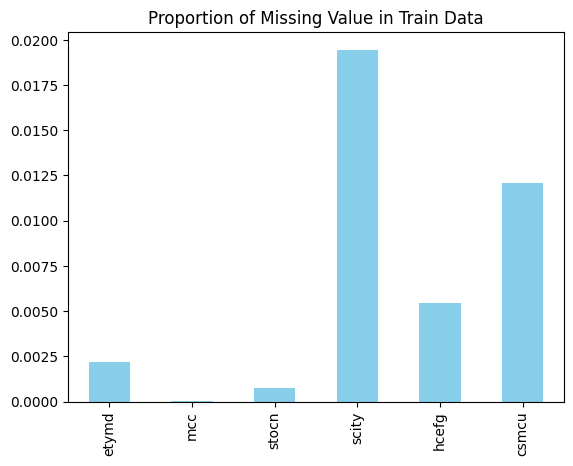

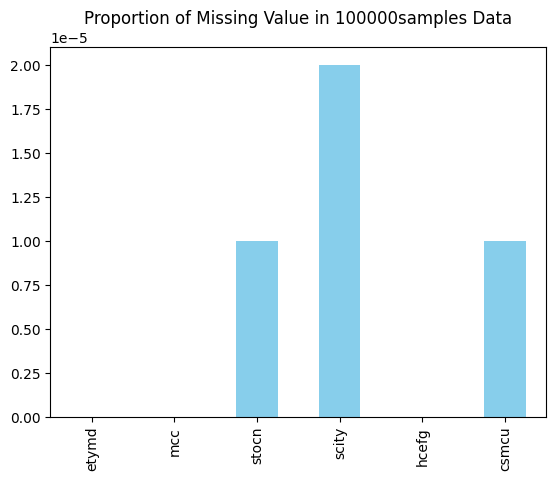

In [ ]:
(train[train.label==a].isna().sum()[train.isna().sum()>0]/len(train[train.label==a])).drop('stscd').plot(kind='bar', color='skyblue') 
plt.title('Proportion of Missing Value in Train Data')
plt.show()

(random_sample[random_sample.label==a].isna().sum()[random_sample.isna().sum()>0]/len(random_sample)).drop('stscd').plot(kind='bar', color='skyblue') 
plt.title(f'Proportion of Missing Value in {len(random_sample)}samples Data')
plt.show()

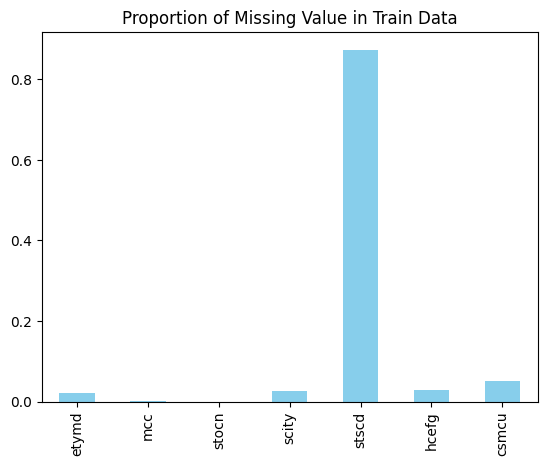

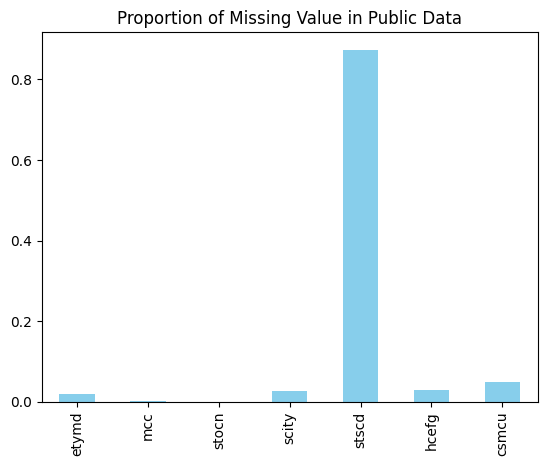

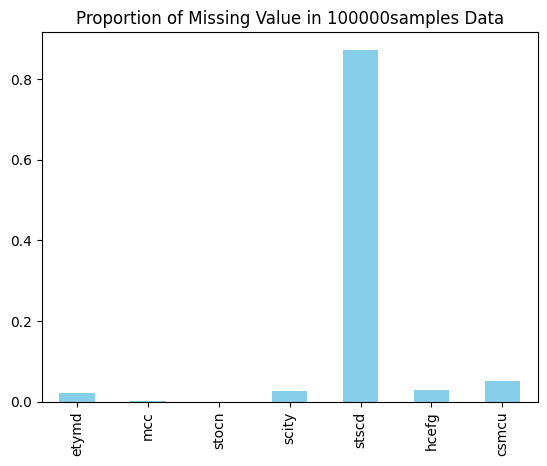

In [ ]:
(train.isna().sum()[train.isna().sum()>0]/sum(train.isna().sum()[train.isna().sum()>0])).plot(kind='bar', color='skyblue') 
plt.title('Proportion of Missing Value in Train Data')
plt.show()

(public.isna().sum()[public.isna().sum()>0]/sum(public.isna().sum()[public.isna().sum()>0])).plot(kind='bar', color='skyblue') 
plt.title('Proportion of Missing Value in Public Data')
plt.show()

(random_sample.isna().sum()[random_sample.isna().sum()>0]/sum(random_sample.isna().sum()[random_sample.isna().sum()>0])).plot(kind='bar', color='skyblue') 
plt.title(f'Proportion of Missing Value in {len(random_sample)} samples Data')
plt.show()

In [ ]:
print((train.isna()).sum(axis=1).value_counts())
print((train[train['label']==0].isna()).sum(axis=1).value_counts())
print((train[train['label']==1].isna()).sum(axis=1).value_counts())


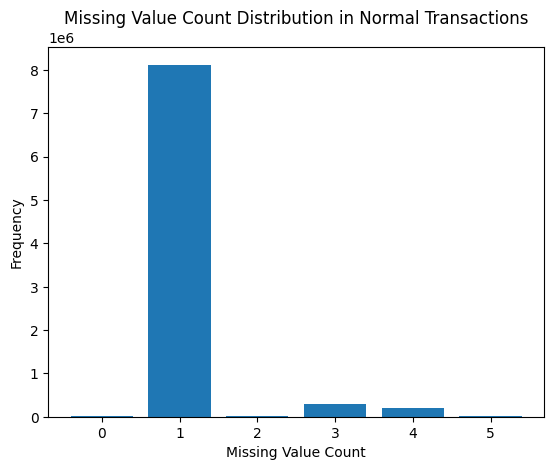

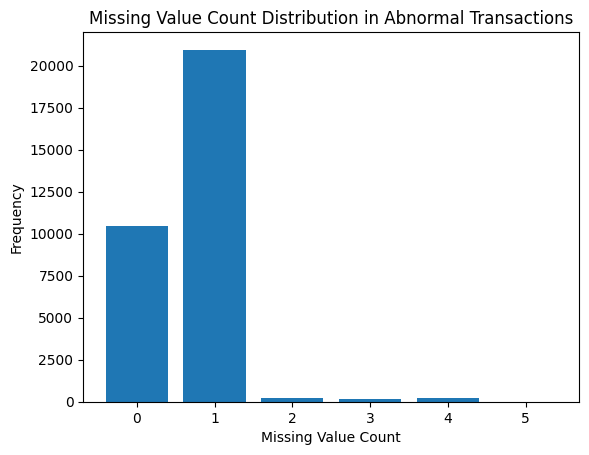

In [ ]:
missing_counts_normal = (train[train['label'] == 0].isna()).sum(axis=1).value_counts()
missing_counts_abnormal = (train[train['label'] == 1].isna()).sum(axis=1).value_counts()
# 绘制直方图
#plt.figure(figsize=(10, 6))
plt.bar(missing_counts_normal.index, missing_counts_normal.values)
plt.xlabel('Missing Value Count')
plt.ylabel('Frequency')
plt.title('Missing Value Count Distribution in Normal Transactions')
plt.show()

plt.bar(missing_counts_abnormal.index, missing_counts_abnormal.values)
plt.xlabel('Missing Value Count')
plt.ylabel('Frequency')
plt.title('Missing Value Count Distribution in Abnormal Transactions')
plt.show()

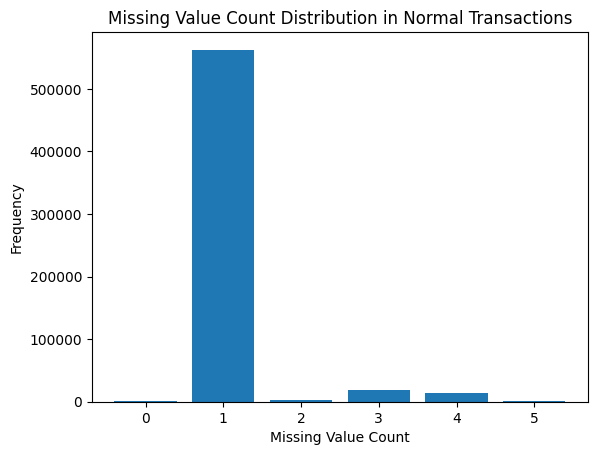

In [ ]:
missing_counts = (public.isna()).sum(axis=1).value_counts()
# 绘制直方图
#plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xlabel('Missing Value Count')
plt.ylabel('Frequency')
plt.title('Missing Value Count Distribution in Normal Transactions')
plt.show()

#### etymd

In [ ]:
print(train[train['label']==0]['etymd'].isna().sum() ,train[train['label']==1]['etymd'].isna().sum())

print(train[train['label']==0]['etymd'].isna().sum()/8656497 ,train[train['label']==1]['etymd'].isna().sum()/32029)


203384 71
0.02349495413675994 0.002216741078397702


In [ ]:
train[train['label']==0]['etymd'].value_counts().sort_index()/sum(train[train['label']==0]['etymd'].value_counts().sort_index())

In [ ]:
print(train[train['label']==0]['etymd'].value_counts().sort_index()/sum(train[train['label']==0]['etymd'].value_counts().sort_index()))
print(train[train['label']==1]['etymd'].value_counts().sort_index()/sum(train[train['label']==1]['etymd'].value_counts().sort_index()))

In [ ]:
sns.countplot(x='etymd', data=train[train['label']==0])
plt.title('Distribution of etymd in Normal Data')
plt.show()

sns.countplot(x='etymd', data=train[train['label']==1])
plt.title('Distribution of etymd in Abnormal Data')
plt.show()

填補+填補後的分布

In [ ]:
train['etymd'] = train['etymd'].fillna(-1)

In [ ]:
sns.countplot(x='etymd', data=train[train['label']==0])
plt.title('Distribution of etymd in Normal Data')
plt.show()

sns.countplot(x='etymd', data=train[train['label']==1])
plt.title('Distribution of etymd in Abnormal Data')
plt.show()

### mcc

In [ ]:
print(train[train['label']==0]['mcc'].isna().sum() ,train[train['label']==1]['mcc'].isna().sum())

print(train[train['label']==0]['mcc'].isna().sum()/8656497 ,train[train['label']==1]['mcc'].isna().sum()/32029)


In [ ]:
print(train[train['label']==0]['mcc'].value_counts())
print(train[train['label']==1]['mcc'].value_counts())

mcc
320.0    1262155
276.0    1140977
282.0     659604
272.0     516844
275.0     379262
          ...   
204.0          1
30.0           1
74.0           1
58.0           1
391.0          1
Name: count, Length: 450, dtype: int64
mcc
324.0    6049
326.0    2078
317.0    2063
325.0    1842
323.0    1601
         ... 
208.0       1
150.0       1
256.0       1
140.0       1
113.0       1
Name: count, Length: 261, dtype: int64


In [ ]:
nmcc_count   = train[train['label']==0].mcc.value_counts()
abnmcc_count = train[train['label']==1].mcc.value_counts()

In [ ]:
abnmcc_count.head(10).index

In [ ]:
for x in abnmcc_count.head(10).index:
    print(nmcc_count.index.get_loc(x))
print('--------------------')
for x in nmcc_count.head(10).index:
    print(abnmcc_count.index.get_loc(x))

In [ ]:
abnmcc_count[nmcc_count.head(10).index]

In [ ]:
plt.bar(nmcc_count[nmcc_count>100000].index, nmcc_count[nmcc_count>100000].values)
plt.xlabel('mcc')
plt.ylabel('Frequency')
plt.title('mcc Count Distribution in Normal Transactions')
plt.show()

In [ ]:
plt.bar(abnmcc_count[abnmcc_count>370].index, abnmcc_count[abnmcc_count>370].values)
plt.xlabel('mcc')
plt.ylabel('Frequency')
plt.title('mcc Count Distribution in Normal Transactions')
plt.show()

In [ ]:
nmcc_count

plt.bar(nmcc_count.index, nmcc_count.values)
plt.xlabel('mcc')
plt.ylabel('Frequency')
plt.title('mcc Count Distribution in Normal Transactions')
plt.show()

#### stscd

In [ ]:
print(train[train['label']==0]['stscd'].value_counts())
print(train[train['label']==1]['stscd'].value_counts())

In [ ]:
sns.countplot(x='stscd', data=train[train['label']==0])
plt.title('Distribution of stscd in Normal Data')
plt.show()

sns.countplot(x='stscd', data=train[train['label']==1])
plt.title('Distribution of stscd in Abnormal Data')
plt.show()

填補+填補後的分布

In [ ]:
train['stscd'] = train['stscd'].fillna(-1)

In [ ]:
sns.countplot(x='stscd', data=train[train['label']==0])
plt.title('Distribution of stscd in Normal Data')
plt.show()

sns.countplot(x='stscd', data=train[train['label']==1])
plt.title('Distribution of stscd in Abnormal Data')
plt.show()

## EDA

In [ ]:
df.describe()

,locdt,loctm,contp,etymd,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
count,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06
mean,2.943696e+01,1.430691e+05,4.904868e+00,4.581256e+00,3.172410e+02,1.428644e+03,5.739214e-01,1.065735e-02,6.105607e-02,1.293398e-03,1.428170e+03,8.396169e+00,1.388305e+04,-9.947255e-01,9.771757e-03,3.030561e-04,5.143982e+00,6.557982e+01,2.822580e+03,8.614072e-02,-6.116599e-02
std,1.729148e+01,5.386045e+04,4.741711e-01,2.395982e+00,6.911332e+01,9.670781e+03,4.945055e-01,1.026829e-01,7.362866e-01,3.594059e-02,9.669248e+03,2.785559e+01,3.870826e+03,1.025132e-01,9.836804e-02,1.740587e-02,2.157913e+00,1.696971e+01,1.105215e+05,2.805717e-01,2.536159e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.400000e+01,1.041240e+05,5.000000e+00,4.000000e+00,2.760000e+02,1.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.050000e+02,0.000000e+00,1.345100e+04,-1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,7.000000e+01,9.400000e+01,0.000000e+00,0.000000e+00
50%,3.000000e+01,1.452160e+05,5.000000e+00,5.000000e+00,2.890000e+02,3.150000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.150000e+02,0.000000e+00,1.575900e+04,-1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,7.000000e+01,2.890000e+02,0.000000e+00,0.000000e+00
75%,4.400000e+01,1.848280e+05,5.000000e+00,5.000000e+00,3.250000e+02,9.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.030000e+02,0.000000e+00,1.575900e+04,-1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,7.000000e+01,9.820000e+02,0.000000e+00,0.000000e+00
max,5.900000e+01,2.359590e+05,6.000000e+00,1.000000e+01,5.010000e+02,5.051970e+06,1.000000e+00,1.000000e+00,3.000000e+01,1.000000e+00,5.032773e+06,1.340000e+02,1.734000e+04,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,8.500000e+01,7.473480e+07,1.000000e+00,1.000000e+00


In [ ]:
#public.columns
numeric_variable = ['locdt', 'loctm', 'conam', 'iterm','flam1', 'csmam']
df[numeric_variable].describe()

,locdt,loctm,conam,iterm,flam1,csmam
count,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06,9.288708e+06
mean,2.943696e+01,1.430691e+05,1.428644e+03,6.105607e-02,1.428170e+03,2.822580e+03
std,1.729148e+01,5.386045e+04,9.670781e+03,7.362866e-01,9.669248e+03,1.105215e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,1.041240e+05,1.050000e+02,0.000000e+00,1.050000e+02,9.400000e+01
50%,3.000000e+01,1.452160e+05,3.150000e+02,0.000000e+00,3.150000e+02,2.890000e+02
75%,4.400000e+01,1.848280e+05,9.010000e+02,0.000000e+00,9.030000e+02,9.820000e+02
max,5.900000e+01,2.359590e+05,5.051970e+06,3.000000e+01,5.032773e+06,7.473480e+07


<Axes: ylabel='Frequency'>

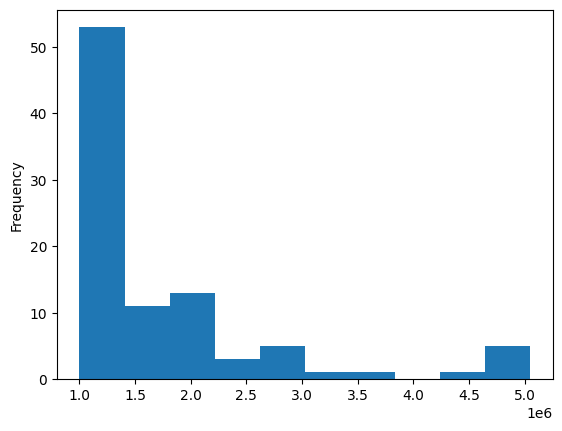

In [ ]:
df.conam.sort_values(ascending = False)[df.conam.sort_values(ascending = False)>1000000].plot(kind='hist')
# df.conam.plot(kind='box')
# plt.show()

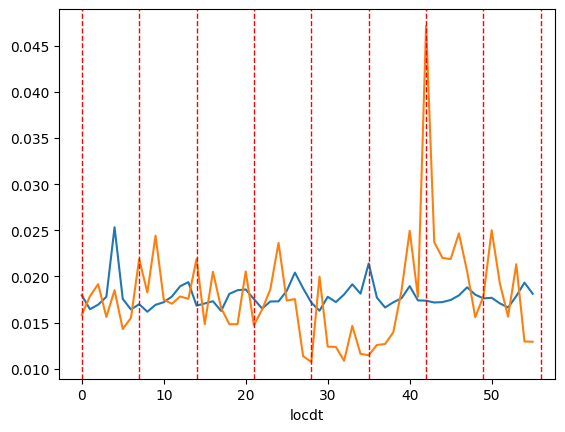

In [ ]:
A = df[df.label==0].locdt.value_counts().sort_index()
B = df[df.label==1].locdt.value_counts().sort_index()
(A/sum(A)).plot()
(B/sum(B)).plot()
for locdt_value in range(min(df['locdt']), max(df['locdt']) + 1, 7):
    plt.axvline(x=locdt_value, color='red', linestyle='--', linewidth=1)
plt.show()

#正常交易高峰 4,13,20,26,33,35,40,47
#異常交易高峰 ,40,42,46,50

In [ ]:
df.chid.value_counts()

chid
f200cd7e88bd814ad8bdf48c02216695ce72375f95873d63cd4bf724ad3e7a11    9674
b59fa05aa098dee0422e892af2e21e66f3f554d05cf950ef46c35fecf105701c    2868
20e72d586a7c7e4acf0f5f52488d3a82764d310a5477363f3e6492e12fc3e42d    2824
75945c8b1b7af88340ffe4169b39341dfded2c07248d36e91b3e2a0852c7bab7    2543
4b3f553fcb079b258f2a6a0c9a09a5b467c5138cda9c740d7b5e7059b00e9752    1743
                                                                    ... 
a94b2c35307a165823e38040f30c633720b922cc5e242b6bf963fb176b724029       1
cd7eeb3797614c101643337f61675d9ca3f185ddb165aaa122e80f6b27810c19       1
67ea8f7ace058835617668f5689b213849188d1d3eefb40c47ab10459403dd23       1
35b2bad388219d5fc7ecfc6089950e0811ff4c2c8945c78a28d2433bc4f80d17       1
85a538fe0cb00a82ebdb948f1a8b45bfea5005dfcf7dcb3c89826033afcdf427       1
Name: count, Length: 487830, dtype: int64

### 分析用戶跟卡號的關係

一張卡(cano)有多個顧客ID(chid) -> 合併

In [ ]:
for x in sorted(df.cards.unique()):
    print(f'{x} 張卡\t　總數 : {len(df[df.cards==x])}, \t 比例:{sum(df[df.cards==x].label>0)/len(df[df.cards==x]) }',)

1 張卡	　總數 : 5894332, 	 比例:0.004777640621532686
2 張卡	　總數 : 2361544, 	 比例:0.0010903883222163127
3 張卡	　總數 : 703139, 	 比例:0.0013269069131423518
4 張卡	　總數 : 212371, 	 比例:0.001299612470629229
5 張卡	　總數 : 70607, 	 比例:0.000807285396632062
6 張卡	　總數 : 25558, 	 比例:0.0007825338445887784
7 張卡	　總數 : 9157, 	 比例:0.000764442503003167
8 張卡	　總數 : 5040, 	 比例:0.0
9 張卡	　總數 : 2614, 	 比例:0.0
10 張卡	　總數 : 1019, 	 比例:0.0
11 張卡	　總數 : 226, 	 比例:0.0
12 張卡	　總數 : 21, 	 比例:0.0
13 張卡	　總數 : 63, 	 比例:0.0
20 張卡	　總數 : 474, 	 比例:0.0
27 張卡	　總數 : 2543, 	 比例:0.0


In [ ]:
cano_chid_counts = df.groupby('cano')['chid'].nunique()
cano_chid_counts

cano
000004e90549c10a46912120949a36bbe9c92fb02daa27703f232957db971a3e    1
00002522901695edfbc8be6728ad6b5cd63f30a9a9b9c9827c2fbb8783119da4    1
0000635e95f06e3542a664112f7dc9610e11ca4de383b1eb72679534e28dabe4    1
000085a95392a936a8f34bdaa9d05f7df0a6c2225cb776895e36dfe1194f52fd    1
0000d1a82b1e29f7902725efd722923c726b5d826d6df3ea75e717a921d68e96    1
                                                                   ..
ffff679504aea1ca2294e4a185bdbdf7d166224f83c42ed4cd4521774fb62aed    1
ffff78f6346f8ae69e0e0501921f429cc3c7f950df85a8c66f09af58eaf2992d    1
ffff84cd1101eec24039332bb90193b9c6f4295e0489851c31b54b8a392a87c9    1
ffff8fed185e7a8295d6081fcac3a78cdd72d08903b95c081d63069a7aec8fbc    1
ffffa5b23e42f7b181116352663f282cd5e2f94a0bf5b6019c8dbbaa9030a8af    1
Name: chid, Length: 627785, dtype: int64

看一個人拿幾張卡

In [ ]:

# 創建一個示例 DataFrame
data = {'chid': ['A', 'A', 'A', 'A', 'B', 'B', 'C'],
        'cano': ['101', '102', '103', '102', '201', '201', '301'],
        'locdt': [1, 2, 3, 1.5,  1, 2, 1],
        'loctm': [120000, 150000,300, 917, 100000, 130000, 90000]}

data = pd.DataFrame(data)

# 對數據按照 chid 和時間進行排序
data = data.sort_values(['chid', 'locdt', 'loctm'])

data['cards_before_time'] = data.groupby('chid')['cano'].expanding().apply(lambda x: x.nunique()).reset_index(level=0, drop=True)

# 計算每個用戶在某個時間之前（含該時間）共拿了幾張不同的卡號
# data['cards_before_time'] = data.groupby(['chid', 'locdt'])['cano'].transform('nunique')

print(data[['chid', 'locdt', 'loctm', 'cano', 'cards_before_time']])


  chid  locdt   loctm cano  cards_before_time
0    A    1.0  120000  101                  3
3    A    1.5     917  102                  3
1    A    2.0  150000  102                  3
2    A    3.0     300  103                  3
4    B    1.0  100000  201                  1
5    B    2.0  130000  201                  1
6    C    1.0   90000  301                  1


In [ ]:
data.groupby('chid')['cano'].cumcount()+1

0    1
1    2
2    3
3    1
4    2
5    1
dtype: int64

### 時間分布
晚上8:00~隔天3:00是盜刷好發時段

In [ ]:
df[df.label==1].h_loctm.value_counts().sort_index()

h_loctm
0     1859
1     1620
2     1504
3     1252
4      936
5      766
6      627
7      676
8      661
9      885
10    1101
11    1186
12    1023
13    1214
14    1479
15    1533
16    1615
17    1649
18    1543
19    1345
20    1747
21    1971
22    1854
23    1983
Name: count, dtype: int64

In [ ]:
4/24


0.16666666666666666

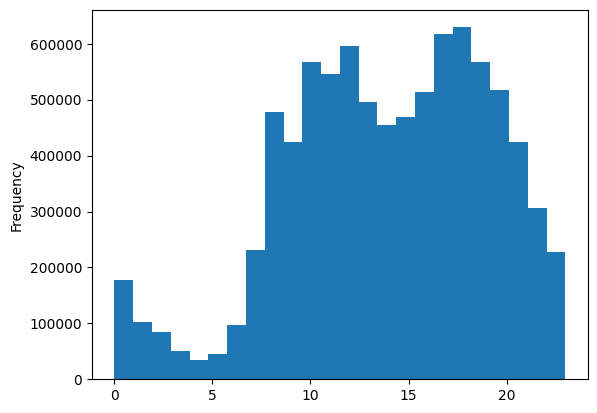

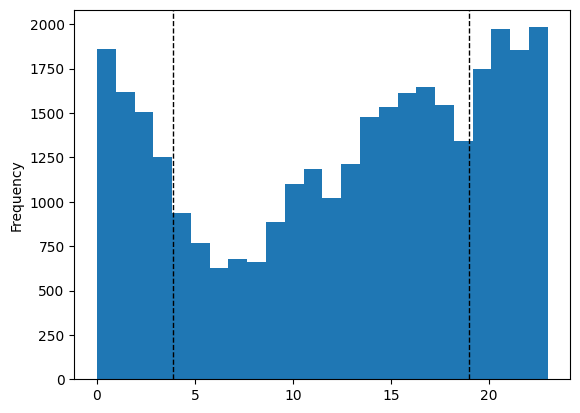

In [ ]:
df[df.label==0].h_loctm.plot(kind='hist',bins = 24)
plt.show()
df[df.label==1].h_loctm.plot(kind='hist',bins = 24)
plt.axvline(x=3.89, color='black', linestyle='--', linewidth=1)
plt.axvline(x=18.95833333333, color='black', linestyle='--', linewidth=1)
plt.show()

分鐘跟秒都沒差

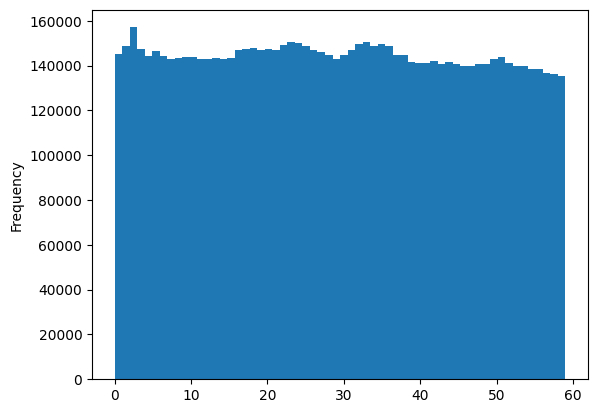

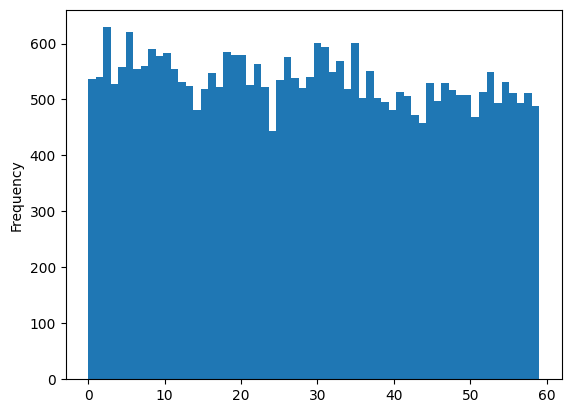

In [ ]:
df[df.label==0].m_loctm.plot(kind='hist',bins=60)
plt.show()

df[df.label==1].m_loctm.plot(kind='hist',bins=60)
plt.show()

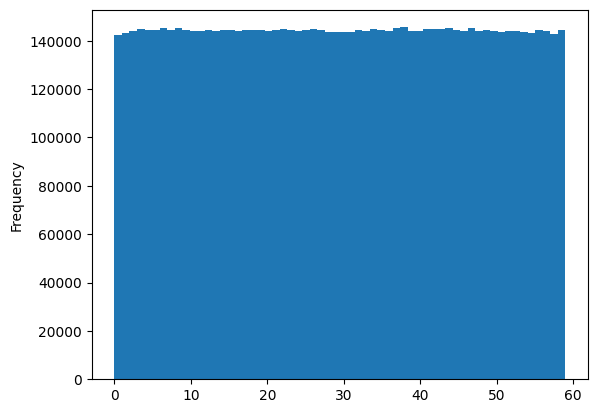

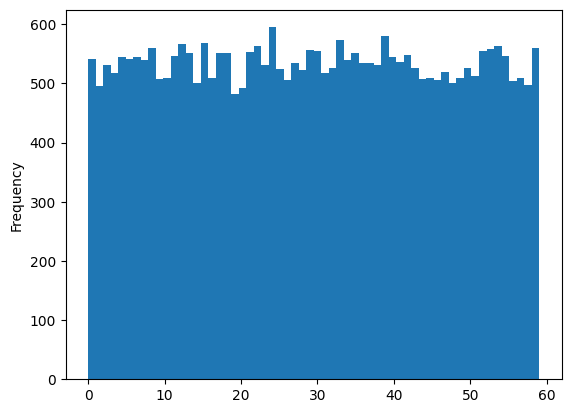

In [ ]:
df[df.label==0].s_loctm.plot(kind='hist',bins=60)
plt.show()

df[df.label==1].s_loctm.plot(kind='hist',bins=60)
plt.show()

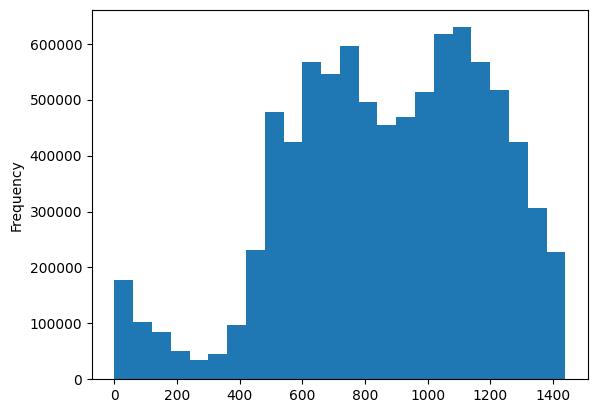

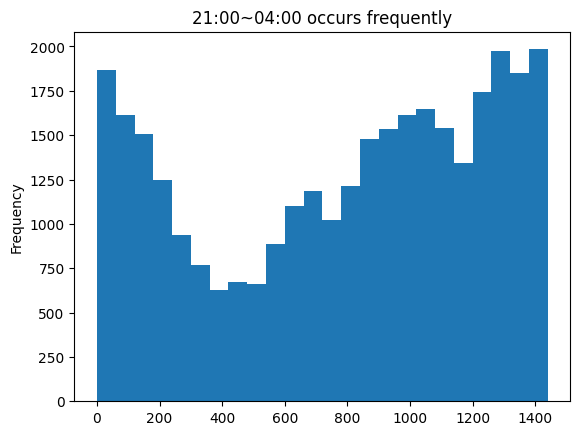

In [ ]:
df[df.label==0].mins_loctm.plot(kind='hist',bins = 24)
plt.show()
df[df.label==1].mins_loctm.plot(kind='hist',bins = 24)
plt.title('21:00~04:00 occurs frequently')
plt.show()

In [ ]:
chid_cano_counts = df.groupby('chid')['cano'].nunique()
df['cards'] = df.chid.map(chid_cano_counts)

csmcu 取對數後接近常態分配

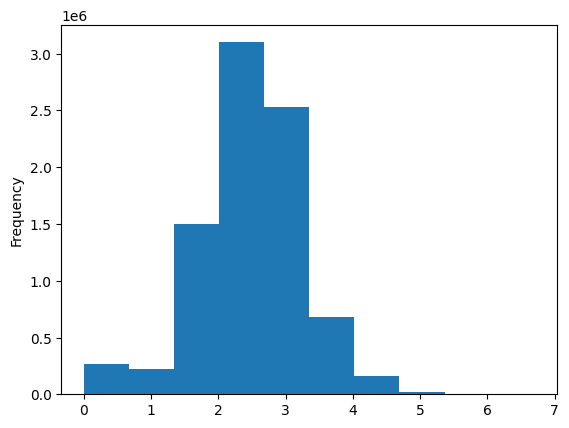

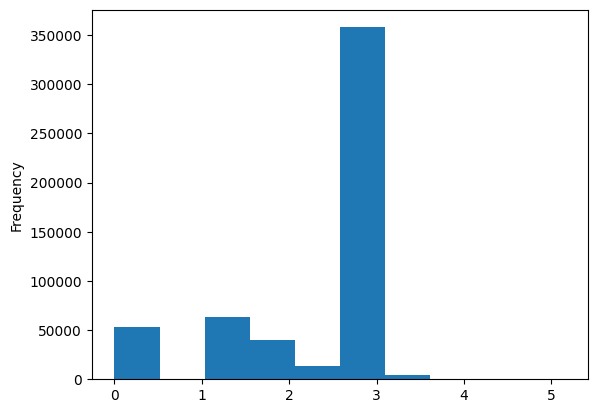

In [ ]:
np.log10(df[(df.csmcu==70)&(df.conam>=0)].conam+1).plot(kind='hist')
plt.show()
np.log10(df[(df.csmcu==-1)&(df.conam>=0)].conam+1).plot(kind='hist')
plt.show()

### 看MCC

In [ ]:
#df.mcc.value_counts()[df.mcc.value_counts()>10000].index
for x in (df.mcc.value_counts()[df.mcc.value_counts()>100000].index):
    print(x, round(df[(df.label>=0)&(df.mcc==x)].label.sum()/len(df[(df.label>=0)&(df.mcc==x)]),4))

320.0 0.0005
276.0 0.0002
282.0 0.001
272.0 0.0004
275.0 0.0006
273.0 0.0002
288.0 0.0001
375.0 0.0001
289.0 0.0
322.0 0.0005
217.0 0.0024
499.0 0.0004
215.0 0.0003
493.0 0.0
406.0 0.0068
494.0 0.0
324.0 0.0572
413.0 0.0047
309.0 0.001


In [ ]:
# 散點圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='label', hue='Class', data=df)
plt.title('Scatter Plot of Time vs Amount')
plt.show()

### Cluster分析

c:\Users\cool8\Documents\GitHub\fraud-detection-E.SUN\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cool8\Documents\GitHub\fraud-detection-E.SUN\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系統找不到指定的檔案。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\cool8\Documents\GitHub\fraud-detection-E.SUN\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\cool8\AppData\Local\Programs\Python\Python311\Lib\su

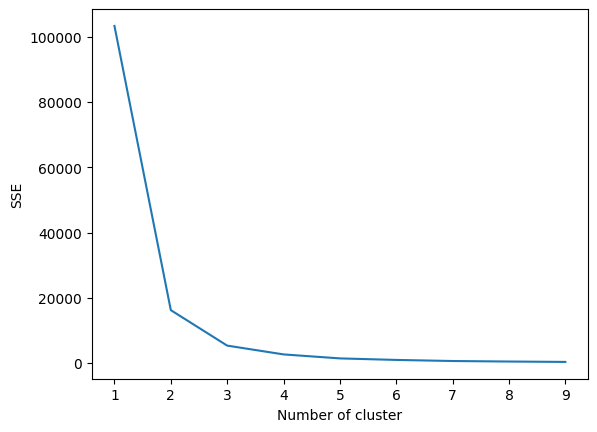

In [ ]:
# change to percentage
ecfg_pct = df.loc[:,['cano','ecfg']][df.label!=-1].groupby('cano').mean()

# clustering by k-means with elbow method

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ecfg_pct)
#   oversea_pct["clusters"] = kmeans.labels_
#   print(oversea_pct["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
##k = 3 
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(ecfg_pct)
ecfg_pct["clusters"] = kmeans.labels_
ecfg_pct.head(20)

c:\Users\cool8\Documents\GitHub\fraud-detection-E.SUN\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ecfg,clusters
cano,,
000004e90549c10a46912120949a36bbe9c92fb02daa27703f232957db971a3e,0.000000,0
00002522901695edfbc8be6728ad6b5cd63f30a9a9b9c9827c2fbb8783119da4,1.000000,1
0000635e95f06e3542a664112f7dc9610e11ca4de383b1eb72679534e28dabe4,0.833333,1
000085a95392a936a8f34bdaa9d05f7df0a6c2225cb776895e36dfe1194f52fd,0.000000,0
0000d1a82b1e29f7902725efd722923c726b5d826d6df3ea75e717a921d68e96,0.000000,0
0000e2fbf64f4865fe66e20a0a63f94af5abc43807123e1781037bc13812b306,1.000000,1
0000fd2e52c5ec225c8114313caae6982e5957d789d6e3a0c935702231904cd7,0.444444,2
0001068bc5c324226b191cbb93d310488c0775facae66b5a36600cb6847edcc3,0.000000,0
00010bf5a87771976d5839f07e4cb09d7b074705bcd9b014aaee619544317c7b,0.000000,0


In [ ]:
# change to percentage
ecfg_pct = df.loc[:,['cano','ecfg']][df.label!=-1].groupby('cano').mean()

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ecfg_pct)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
df.columns

Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk', 'label', 'weekday', 'h_loctm', 'm_loctm', 's_loctm',
       'mins_loctm'],
      dtype='object')

看數值型變數的相關性(不太相關)

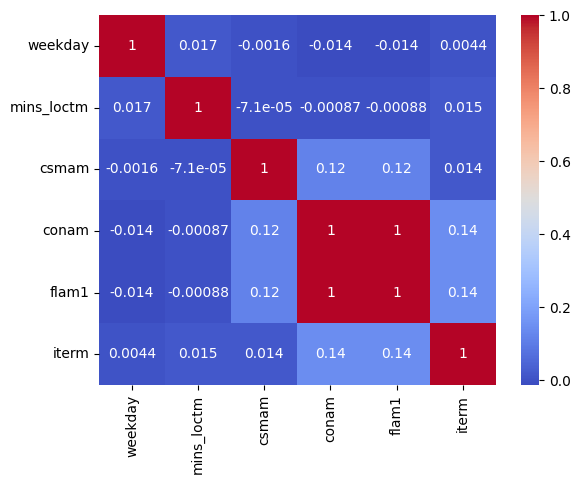

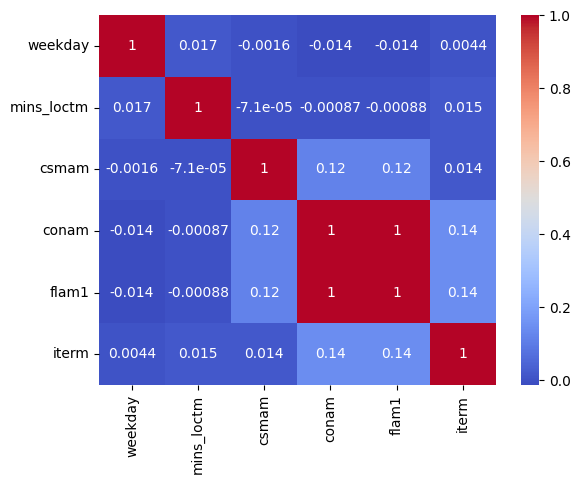

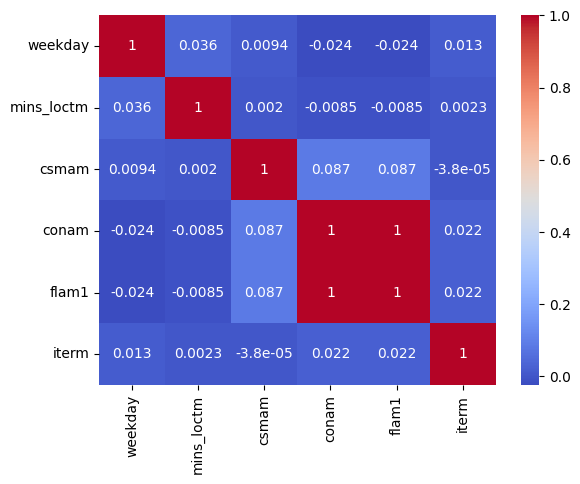

In [ ]:
numeric_variable = ['weekday','mins_loctm','csmam','conam','flam1','iterm']
# df[numeric_variable].corr

correlationNonFraud   = df[df.label== 0][numeric_variable].corr()
correlationFraud      = df[df.label== 1][numeric_variable].corr()

#training的corr
sns.heatmap(df[df.label== 0][numeric_variable].corr(), cmap='coolwarm', annot=True)
plt.show()

#正常的corr
sns.heatmap(correlationNonFraud, cmap='coolwarm', annot=True)
plt.show()

#盜刷的corr
sns.heatmap(correlationFraud, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
cards = df[df.label!=-1].cano.unique()

A = df[df.label==-1].cano.isin(cards).sum()
print('publict重複用戶總數：',A,'　比例：',A/len(df[df.label==-1]))


publict重複用戶總數： 586371 　比例： 0.9769886467771443


In [ ]:
print(len(df[(df.ecfg==0)&(df.label==1)])/len(df[(df.ecfg==0)&(df.label!=-1)]))
print(len(df[(df.ecfg==1)&(df.label==1)])/len(df[(df.ecfg==1)&(df.label!=-1)]))

0.0011285825841717704
0.005600335794782061


In [ ]:
A = df[df.cano.isin(df[df.label==1].cano)&(df.label!=-1)].sort_values(['locdt','loctm']).groupby('cano')['label'].cumsum()+1
A

2758173    1.0
1679610    1.0
3888207    2.0
2411515    1.0
7757530    2.0
          ... 
7959666    2.0
6724745    2.0
6854036    3.0
3927757    4.0
2493909    4.0
Name: label, Length: 72464, dtype: float64

In [ ]:
df[(df.scity.isin(df.scity.value_counts().head(10).index))&df.stocn==0].label.value_counts()

label
 0.0    8481444
-1.0     586117
 1.0      22676
Name: count, dtype: int64

In [ ]:
df.cano.value_counts()

cano
f740c6359369dd973f53180fa50db3ca96d81c9054dad7086cad18d460daae97    4680
e12336ad8f5aa0bcd0271a46869cf81cafbd7591f7eeb542b6a50c9b7c3e0142    3967
27f62a67d87256dbff64aca05502d8a7d7a9e8248c531bc305776e4a74d15751    2868
5606f28867295bd1c4ac3a784b36896d7e3f70a49bfa4f3f591721d00c00075a    2822
8b192f8e96d3844745a47ea0a0b1f29adc86a6f6010eed4fba56b1b46148fdb8    1554
                                                                    ... 
43c6600a43499c22ac66922165dcff20a8b107451e0816f444c654de9806f4a6       1
69fe6fbbd2016b40e4b16f97953904ff119c43ea138b4f9ebd98f2396eb50490       1
9d1028a61091a5296b200a69ca3aa2bbdba8d52e3e223f7b346d0acaa7fc5eba       1
4824a7977a544a565819d0d5cd75c9b76aa849e37f4078529ceb5db5135f2662       1
2990660b8172986c57c793f16bb565ae29cd7572b50f05afbe860cf7c9125035       1
Name: count, Length: 627785, dtype: int64

In [ ]:
cano = df.cano.unique()


NameError: name 'cards' is not defined

In [ ]:
def calculate_mode(x):
    # 對每個cano計算當前時間之前的資料的眾數
    return x.loc[x['mins_loctm'] <= x['mins_loctm'].max(), 'mchno'].mode()

cano_array = df.cano.unique()
for x in cano_array:
    df_sort[df.cano== x].apply(calculate_mode)


# 使用 groupby 和 apply 進行計算
result = df_sort.cano.groupby(['cano', 'mins_loctm']).apply(calculate_mode).reset_index()

# 重命名結果列
result.columns = ['cano', 'mode_mchno']

# 將結果合併到原始 DataFrame
df_sort = pd.merge(df_sort, result, on='cano', how='left')


In [ ]:
def calculate_mode(x):
    # 對每個cano計算當前時間之前的資料的眾數
    return x.loc[x['mins_loctm'] <= x['mins_loctm'].max(), 'mchno'].mode()

# 使用 groupby 和 apply 進行計算
result = df_sort.groupby(['cano', 'mins_loctm']).apply(calculate_mode).reset_index()

# 重命名結果列
result.columns = ['cano', 'mode_mchno']

# 將結果合併到原始 DataFrame
df_sort = pd.merge(df_sort, result, on='cano', how='left')


KeyboardInterrupt: 

In [ ]:
df_sort

In [ ]:
def calculate_mode(x):
    
    return x.loc[x['mins_loctm'] <= x['mins_loctm'].max(), 'mchno'].mode()

# 按照 cano 进行分组，并应用 calculate_mode 函数
result = df_sort.apply(calculate_mode).reset_index()

In [ ]:
def calculate_mode(x):
    return x.loc[x['mins_loctm'] <= x['mins_loctm'].max(), 'mchno'].mode()

# 按照 cano 进行分组，并应用 calculate_mode 函数
# result = df_sort.groupby('cano').apply(calculate_mode).reset_index()

df.cano
# df_sort[df.cano==x]


# # 重命名结果列
# result.columns = ['cano','counts' ,'mode_mchno']

# # 输出结果
print(result)

df.cano.nunique()

                                                     cano  level_1  \
0       000004e90549c10a46912120949a36bbe9c92fb02daa27...        0   
1       000004e90549c10a46912120949a36bbe9c92fb02daa27...        1   
2       00002522901695edfbc8be6728ad6b5cd63f30a9a9b9c9...        0   
3       00002522901695edfbc8be6728ad6b5cd63f30a9a9b9c9...        1   
4       0000635e95f06e3542a664112f7dc9610e11ca4de383b1...        0   
...                                                   ...      ...   
889736  ffff8fed185e7a8295d6081fcac3a78cdd72d08903b95c...        0   
889737  ffff8fed185e7a8295d6081fcac3a78cdd72d08903b95c...        1   
889738  ffffa5b23e42f7b181116352663f282cd5e2f94a0bf5b6...        0   
889739  ffffa5b23e42f7b181116352663f282cd5e2f94a0bf5b6...        1   
889740  ffffa5b23e42f7b181116352663f282cd5e2f94a0bf5b6...        2   

                                                    mchno  
0       09dd1fa2117349dc7fcbe7d88a8bbdab3eac610019010b...  
1       c8131b6b345e94a8ff34642eae76ad4

627785

In [ ]:
A = df[(df.label==1)].cano

B = df[(df.label==1)&df.cano.isin(A)].groupby('cano')['locdt']
BB = df[(df.label==0)&df.cano.isin(A)].groupby('cano')['locdt']


df[(df.label==1)].h_loctm.value_counts().sort_index().plot(kind='bar')
plt.show()

# df['mins_loctm'] =  (df.h_loctm*3600  + df.m_loctm*60 + df.s_loctm) /60
df[(df.label!=-1)&(df.cano.isin(A))].mins_loctm.plot(kind='hist',bins=48)
df[(df.label==1)].mins_loctm.plot(kind='hist',bins=48,color='red')

plt.show()


def IQR(x):
    return np.quantile(x,.75)-np.quantile(x,.25)

k=0
for x,y in B:
    k+=1
    print(f'---------{k}---------')
    print(x,y)
    if k==10:break

,cano,counts,mode_mchno
0,000004e90549c10a46912120949a36bbe9c92fb02daa27...,1,09dd1fa2117349dc7fcbe7d88a8bbdab3eac610019010b...
1,000004e90549c10a46912120949a36bbe9c92fb02daa27...,2,c8131b6b345e94a8ff34642eae76ad4c71ce2027475ebc...
2,00002522901695edfbc8be6728ad6b5cd63f30a9a9b9c9...,1,12c5b8c7cac508b0cf7214cee8c8ea9ebe1e23c5b0dd67...
3,00002522901695edfbc8be6728ad6b5cd63f30a9a9b9c9...,2,216746c656372b82ca4960810749f3fd026977c793cebf...
4,0000635e95f06e3542a664112f7dc9610e11ca4de383b1...,1,e8d98e44151198526e079fdcc7f44c1e16be6f1fc2fb96...
...,...,...,...
889736,ffff8fed185e7a8295d6081fcac3a78cdd72d08903b95c...,1,6c1fee0b78cb9da9ba0e4d3c91e75b3c195d66a974d9d6...
889737,ffff8fed185e7a8295d6081fcac3a78cdd72d08903b95c...,2,9c18b9f9ea22011e9c30d284718fc42a4fa1272c356936...
889738,ffffa5b23e42f7b181116352663f282cd5e2f94a0bf5b6...,1,60a54fc232711d35dd53ae3c85afd669264bb97daee8a4...
889739,ffffa5b23e42f7b181116352663f282cd5e2f94a0bf5b6...,2,f9d987b3ef37721a886f720cdf4eb57dd71e9134999522...


### 模型試跑

In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 删除对象类型的列
training_data = training_data.drop(categorical_columns, axis=1)
public_data = public_data.drop(categorical_columns, axis=1)

# 分割特征和标签
X = training_data.drop(['txkey', 'label'], axis=1)
y = training_data['label']

# 使用SMOTE处理不平衡数据
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 划分训练集和验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 定义LightGBM分类器
model = lgb.LGBMClassifier(objective='binary', random_state=42)

# 设置参数网格
param_grid = {
    'n_estimators': [500],  # 树的数量
    'max_depth': [4, 5],  # 树的深度
    'learning_rate': [0.1, 0.2],  # 学习率
    'min_child_weight': [1, 2],  # 叶子节点的最小权重和
    'subsample': [0.8],  # 用于训练每棵树的样本比例
    'colsample_bytree': [0.8],  # 每棵树的特征比例
    'reg_alpha': [0, 1],  # L1 正則化項
    'reg_lambda': [0, 1],  # L2 正則化項
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])]  # 添加scale_pos_weight
}

# 使用StratifiedKFold进行交叉验证
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=cv, verbose=2, n_jobs=-1)

# 执行网格搜索
grid_search.fit(X_resampled, y_resampled)

# 输出最佳参数
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# 获取最佳模型
best_model = grid_search.best_estimator_

# 训练最佳模型
best_model.fit(X_resampled, y_resampled)

# 预测验证集
y_pred = best_model.predict(X_valid)

# 评估模型
f1 = f1_score(y_valid, y_pred)

print(f'F1 Score on Validation Set: {f1}')

# 预测公共数据
X_public = public_data.drop('txkey', axis=1)
public_predictions = best_model.predict(X_public)
